# Основы статистического анализа

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
from scipy.stats import ttest_rel
import scipy.stats
from scipy import stats 

In [99]:
# функция для Визуализаций двух графиков в одном 
def two_histograms(x, y, c1='#000', c2='red', bs= 45):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.8, bins = bs, color=c1, weights=[1./len(x)]*len(x))  
    y.hist(alpha=0.5, bins = bs, color=c2, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='green', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

<div class="alert alert-info" style="background: #91D3C3; color: #000">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [100]:
sd = np.sqrt(225)
acc = 3
Z = 1.96 # из таблицы при уровне доверия 0.95

n = (( Z * sd ) / acc ) ** 2

In [101]:
 round(n)

96

<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

<div class="alert alert-info"style="border: 6px solid #91D3C3;background: #D2E7A6; color: #000">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [102]:
Z = 2.326 # Из таблицы при 98% 
sd = 15
X = 130
n = 25

left = X - ( ( sd / np.sqrt(n) )  * Z )
right = X + ( ( sd / np.sqrt(n) )  * Z )


In [103]:
L = round(right - left)
L

14

<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info"style="border: 6px solid #D2E7A6;background: #91D3C3; color: #000">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [104]:
np.random.seed(42)  # Закрепим seed для воспроизводимости результата.

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

p_value = stats.ttest_ind(mens, womens) 
equal_var = 0.001

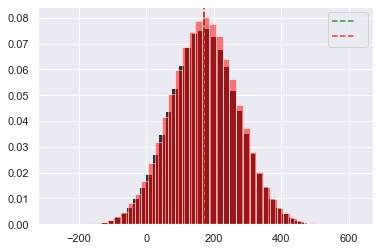

In [105]:
two_histograms(pd.Series(womens),  pd.Series(mens))

In [106]:
print(f'Критерий p-value {p_value.pvalue}')
print(f'Уровень значимости  {equal_var}')
  
if p_value.pvalue < equal_var:
    print(f'\tРазличие между выборками имеет вес')
else:
    print(f'\tРазличие между выборками не рассматривается')

Критерий p-value 0.00024875321033580573
Уровень значимости  0.001
	Различие между выборками имеет вес


<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info"style="background: #D2E7A6; color: #000">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [107]:
sd = 150
acc = 50
Z = 1.96 # из таблицы при уровне доверия 95%

n = round((( Z * sd ) / acc ) ** 2)
n

35

<hr style="border: 2px solid #3FA5F2;; margin: 0 0 44px 0">

<div class="alert alert-info"style="border: 6px solid #91D3C3;background: #D2E7A6; color: #000">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [108]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [109]:
chi, pval, dof, exp = stats.chi2_contingency(observations.values) #Критерий Пирсона (хи квадрат)
val = 0.05

print(f'p-критерий - {pval}\n')
if pval < val:
    print(f'При уровне значимости {val} маг действительно предсказывает погоду.')
else:
    print(f'При уровне значимости {val} маг блефует.')
    
  

p-критерий - 0.35396880166541644

При уровне значимости 0.05 маг блефует.


<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

<div class="alert alert-info" style="background: #D2E7A6; color: #000; border: 6px solid #91D3C3;">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [110]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, round(m-h, 2), round(m+h, 2)

In [111]:
print(f'Вычислены границы доверительных интервалов – ({mean_confidence_interval(data, 0.9)[1]} - {mean_confidence_interval(data, 0.9)[2]})')


Вычислены границы доверительных интервалов – (6.07 - 7.18)


<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

<div class="alert alert-info"style="background: #91D3C3; color: #000">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [123]:

A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [119]:
df = pd.DataFrame(zip(A, B), columns = ['A', 'B'])
df.head()

,A,B
0,4,5
1,5,6
2,8,7
3,9,8
4,6,4


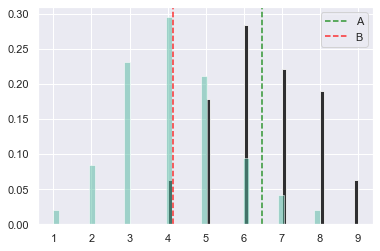

In [115]:
two_histograms(df['A'],  df['B'], "#000", "#53BAA1")


In [155]:
res = stats.ttest_ind(A, B)
print(f'\np-value -  {res.pvalue}\nСравним среднее значение выборок.')
val = 0.05

if res.pvalue > val:
    print(f'\nСписки принадлежат одному множеству. Гипотеза о средних значениях выборок подтверждается {round(res.pvalue, 3) * 100} процентами')
else:
    print('\nГипотеза отвергается, списки из разных множеств ')


p-value -  0.5728335812859409
Сравним среднее значение выборок.

Списки принадлежат одному множеству. Гипотеза о средних значениях выборок подтверждается 57.3 процентами


<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

<div class="alert alert-info"  style="background: #D2E7A6; color: #000">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

<p style='font-size: 19px; padding: 33px;border:1px solid #B00000 ;color: #B00000'>p-value менее 0,05, мы можем опровергнуть нулевую гипотезу о том, что распределение является нормальным </p>

<hr style="border: 2px solid #3FA5F2; margin: 0 0 44px 0">

<div class="alert alert-info"style="background: #D2E7A6; color: #000">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [112]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

test = stats.ttest_rel(A, B) 
equal_var = 0.05
if test.pvalue < equal_var:
    print(f'Действия препаратов A и B имеет существенное различие. p-value - {test.pvalue} ')
else:
    print(f'Эффективность препаратов имеет не значительное различие. p-value - {test.pvalue}')

Действия препаратов A и B имеет существенное различие. p-value - 0.042739435733033855 


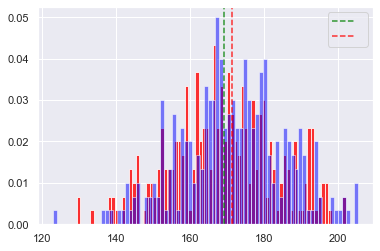

In [113]:
two_histograms(pd.Series(A), pd.Series(B), 'red', 'blue', 77)


<ul style='list-style-type: circle; font-size: 19px; border:1px solid #B00000; padding: 33px; color: #B00000'>
<li>По предложенным выборкам, опираясь на указанный уровень значимости,  используя t-тест, выходит результат</li>
<li>По второму пункту задачи, минимальным p-value может быть не менее указанного уровня значимости</li>
<li>Третий пункт - визуал необходим в любом случае
</li>
</ul>